In [2]:
!pip install pyplr
!pip install neurokit2
!pip install fastnumbers
!pip install datamatrix

import sys
sys.path.append("../Pupillengröße/Skripte/")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import logging as log
from preprocessfunction2 import PLR2d
from preprocessfunction3 import PLR3d
import checkdata
import importlib
from IPython.display import display
def display_all(df):
    from IPython.display import HTML, display
    IPython.display(IPython.HTML(df.to_html()))


In [3]:
# reload checkdata
importlib.reload(checkdata)
plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams['figure.dpi'] = 200 
subject_id="PJ02_1_Ruhe"
data_dir="../data/groesse/3.4Stimulation/"
config=checkdata.DataConfig(window_duration=30)
eye0=checkdata.prepare(data_dir,subject_id,0,config)
eye1=checkdata.prepare(data_dir,subject_id,1,config)
# checkdata.plot(eye0[0],"auge 0 (0)")
# display(eye0[0])


### Use datamatrix from pydatamatrix.eu to fill in blinking gaps

pandas.core.series.Series

<Axes: xlabel='pupil_timestamp'>

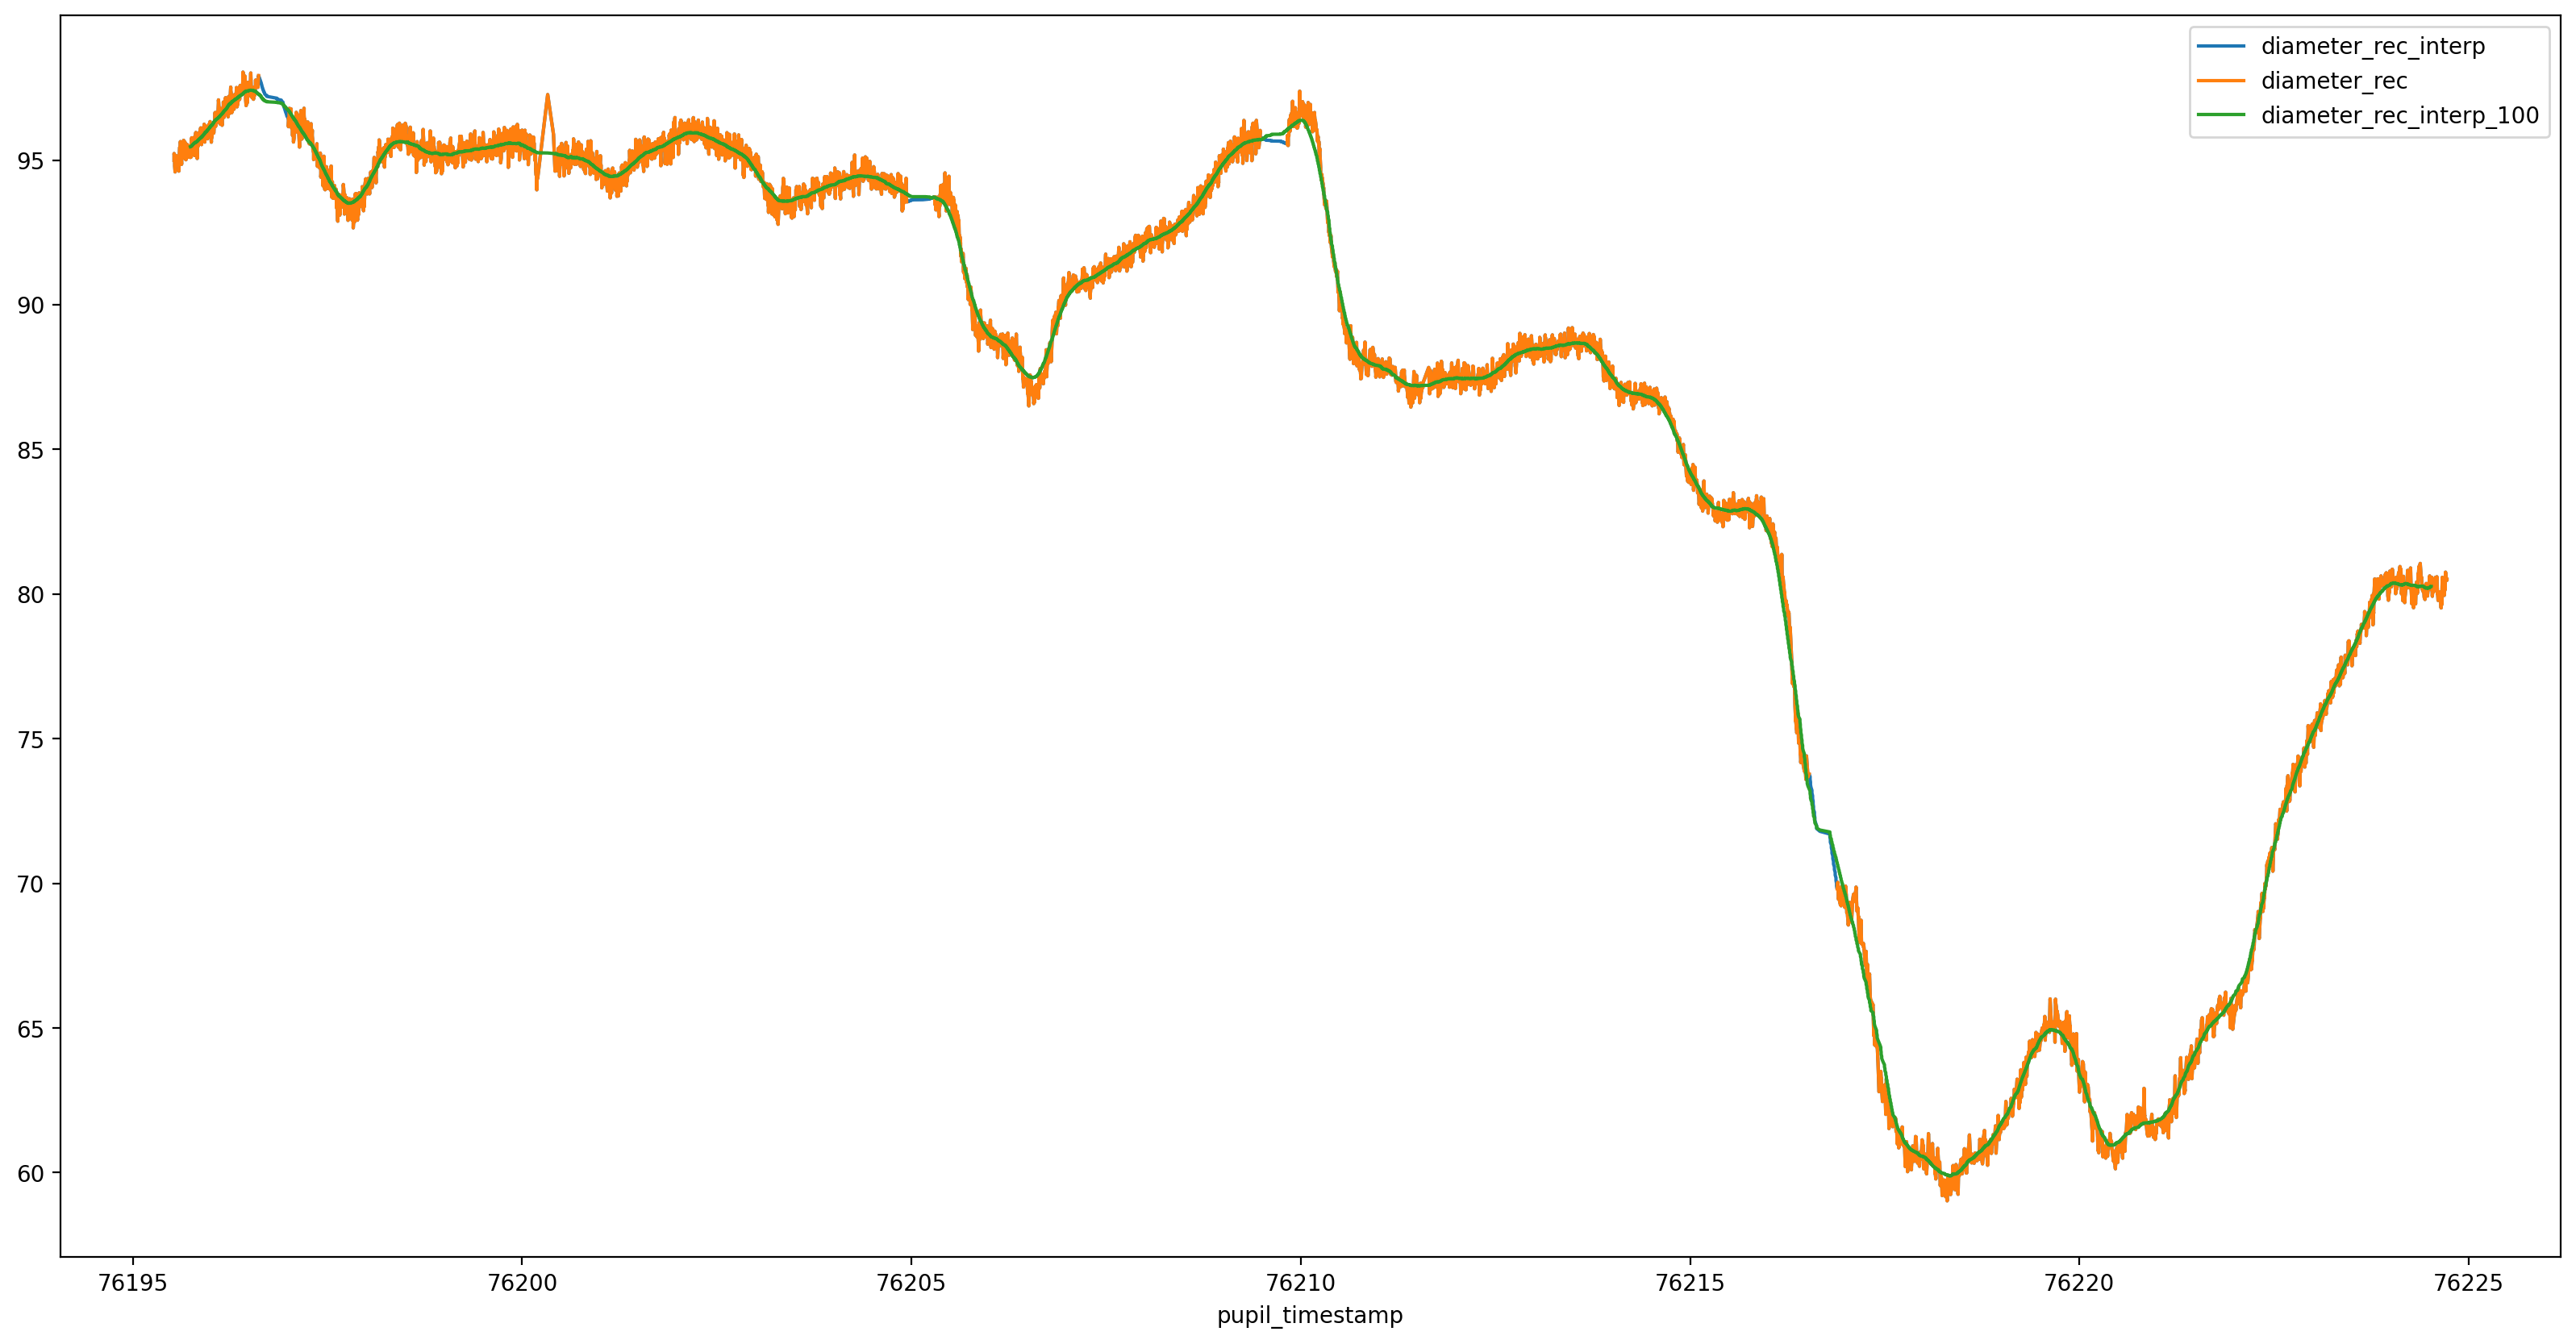

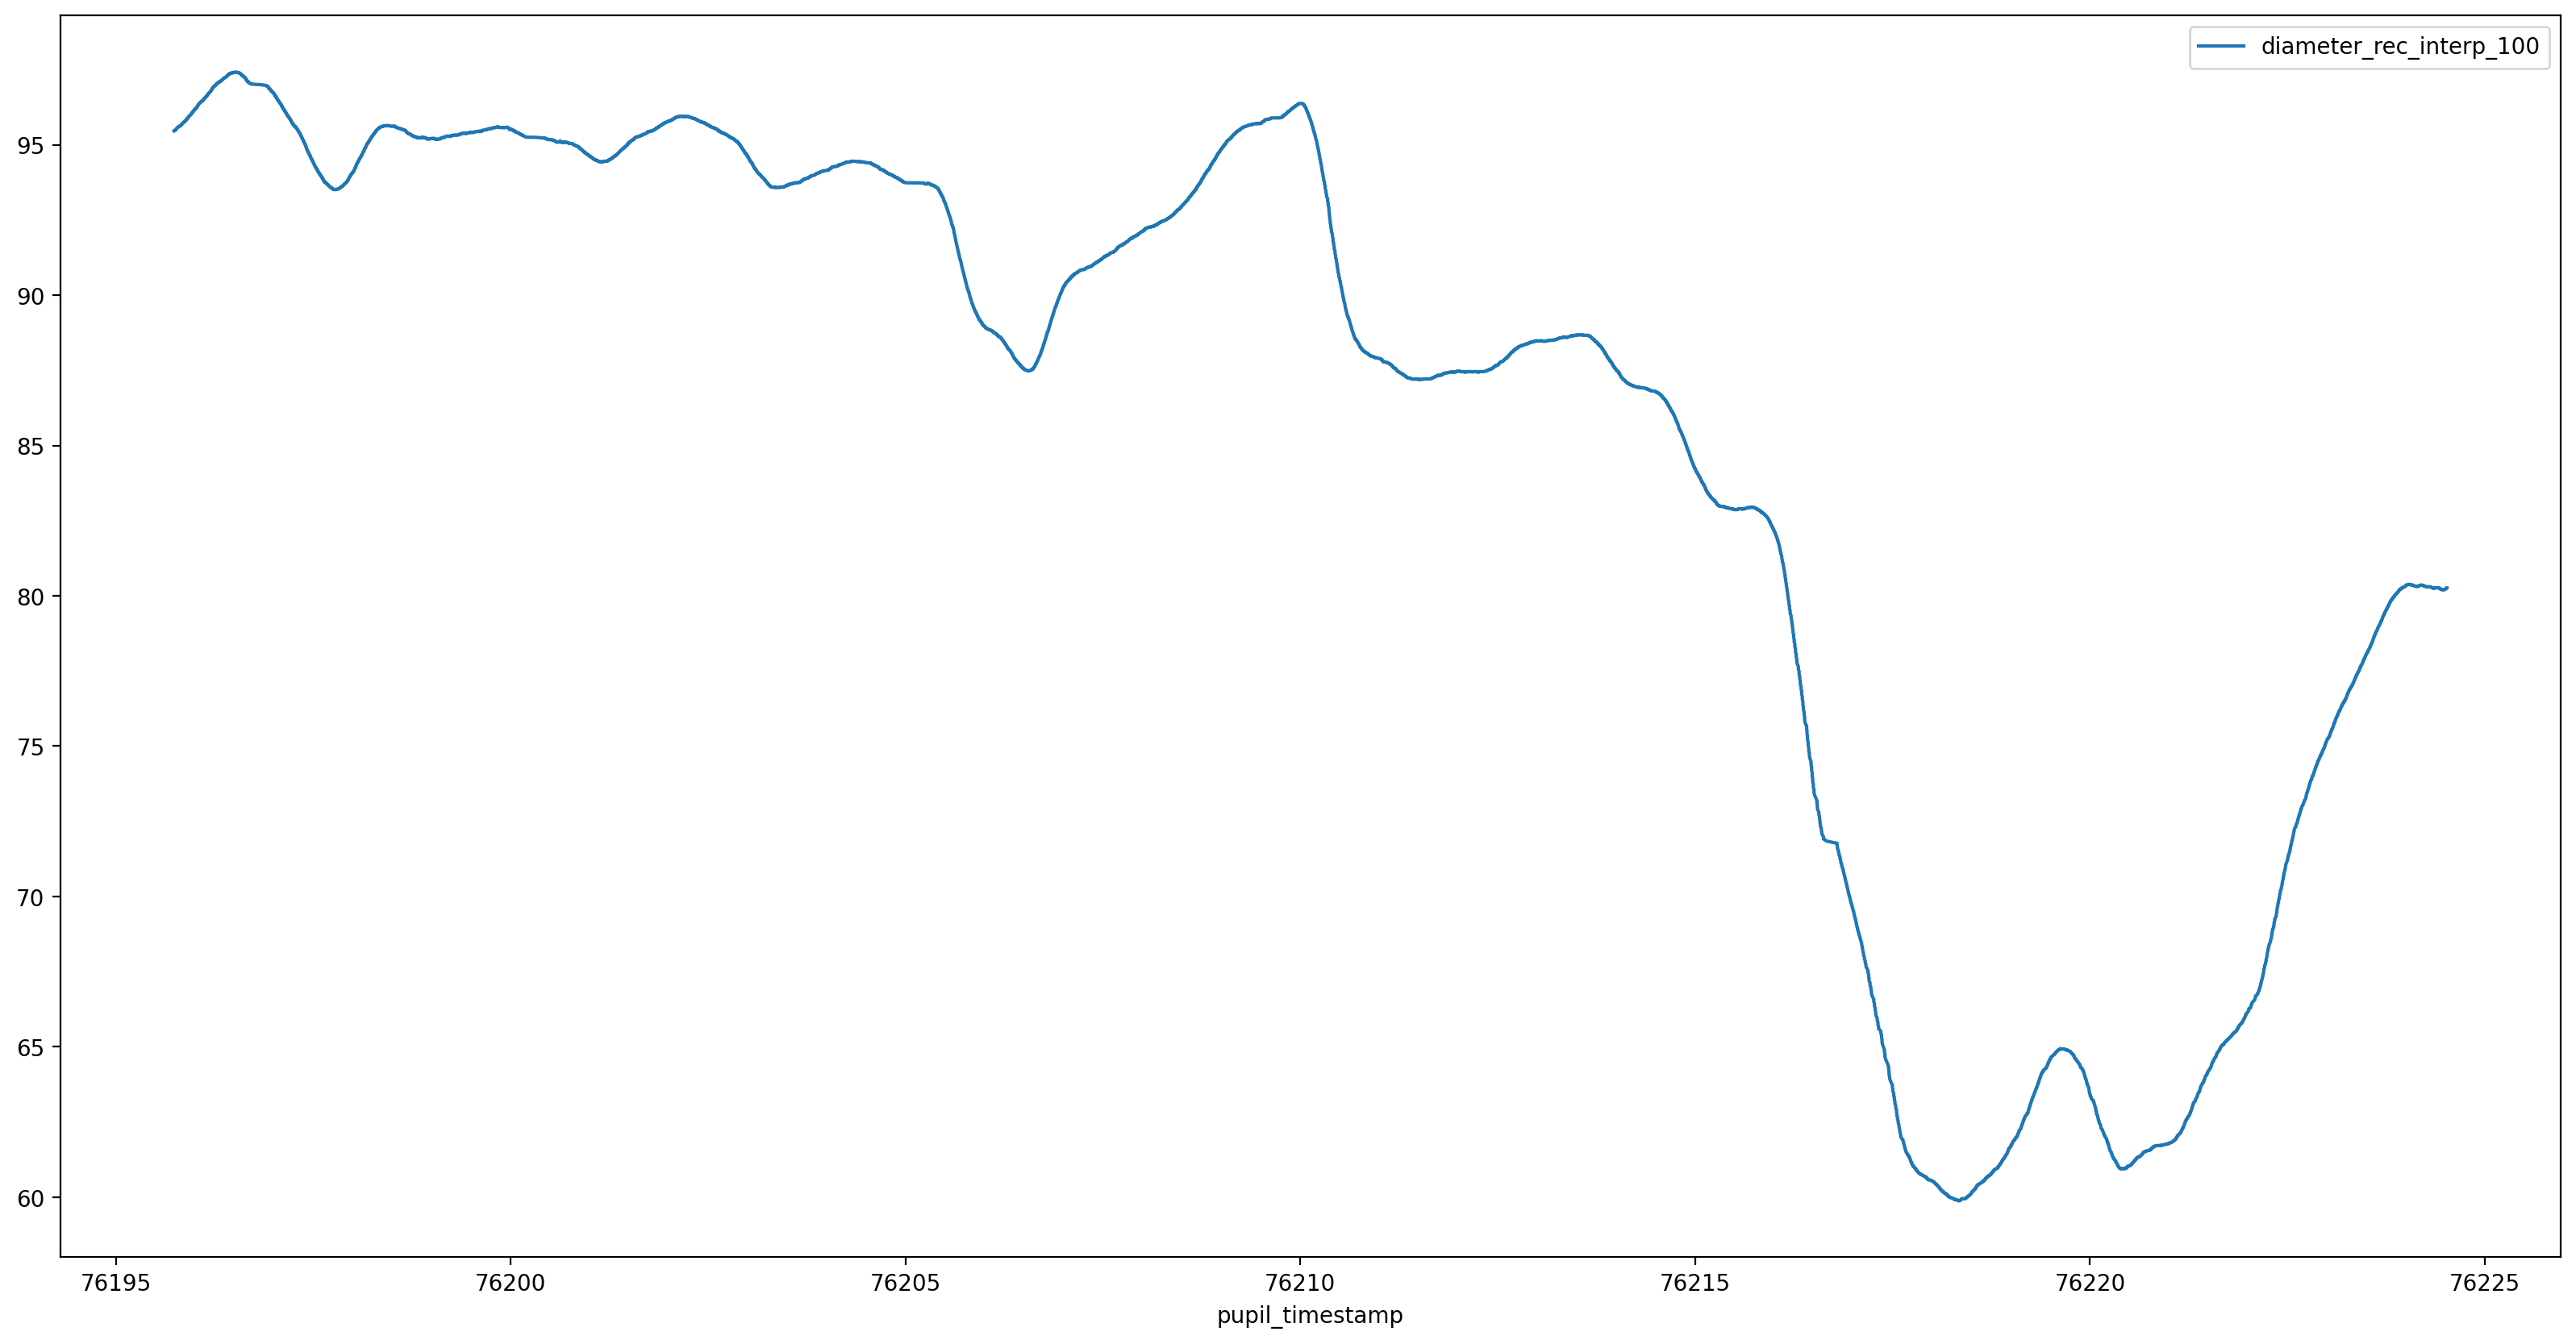

In [5]:
importlib.reload(checkdata)
# Let's try to remove blinks and filter the result
what=eye0[0]

def reconstruct(eye, window_size=100):
    # Remove blinks.
    eye['diameter_rec']=checkdata.blinkreconstruct(eye['diameter'], mode='advanced')
    # blinkreconstruct replaces the bliks with NaN with mode='advanced',
    # so we interpolate the gaps and low pass the result to obtain something. 
    eye['diameter_rec_interp']=eye['diameter_rec'].interpolate(method='linear')
    # Use moving average + recenter as low pass.
    eye['diameter_rec_interp_100']=eye['diameter_rec_interp'].rolling(window=window_size).mean().shift(-window_size//2)
    
# How does it look like?
eye=eye0[0]
reconstruct(eye)
sub=eye.plot(x='pupil_timestamp', y='diameter_rec_interp', kind='line')
sub2=eye.plot(ax=sub,x='pupil_timestamp', y='diameter_rec', kind='line')
eye.plot(ax=sub2,x='pupil_timestamp', y='diameter_rec_interp_100', kind='line')
eye.plot(x='pupil_timestamp', y='diameter_rec_interp_100', kind='line')
